# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [58]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [32]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [33]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [34]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Naive Bayes

### GaussianNB

In [59]:
time1_nb_0 = datetime.datetime.now()

nb_0 = GaussianNB()
model_nb_0 = nb_0.fit(X_train, y_train)
y_nb_0 = model_nb_0.predict(X_test)
y_probs_nb_0 = model_nb_0.predict_proba(X_test)[:, 1]
time2_nb_0 = datetime.datetime.now()
print_score(y_test,y_nb_0,time1_nb_0,time2_nb_0)

comfusion matrix = 
[[2839    0]
 [4253    1]]

accuracy_score =  0.40039475539264063

completeness =  0.00023507287259050304
contamination =  0.0

precision score =  1.0
recall score =  0.00023507287259050304

F1 score =  0.00047003525264394824

time span=  0:00:00.058347


In [60]:
time1_nb_1 = datetime.datetime.now()

nb_1 = GaussianNB()
model_nb_1 = nb_1.fit(X_std_train, y_train)
y_nb_1 = model_nb_1.predict(X_std_test)
y_probs_nb_1 = model_nb_1.predict_proba(X_std_test)[:, 1]
time2_nb_1 = datetime.datetime.now()
print_score(y_test,y_nb_1,time1_nb_1,time2_nb_1)

comfusion matrix = 
[[   0 2839]
 [   1 4253]]

accuracy_score =  0.5996052446073594

completeness =  0.9997649271274095
contamination =  0.4003102086858432

precision score =  0.5996897913141568
recall score =  0.9997649271274095

F1 score =  0.7496915212409658

time span=  0:00:00.055855


In [61]:
time1_nb_2 = datetime.datetime.now()

nb_2 = GaussianNB()
model_nb_2 = nb_2.fit(X_mm_train, y_train)
y_nb_2 = model_nb_2.predict(X_mm_test)
y_probs_nb_2 = model_nb_2.predict_proba(X_mm_test)[:, 1]
time2_nb_2 = datetime.datetime.now()
print_score(y_test,y_nb_2,time1_nb_2,time2_nb_2)

comfusion matrix = 
[[   0 2839]
 [   9 4245]]

accuracy_score =  0.5984773720569576

completeness =  0.9978843441466855
contamination =  0.4007622811970638

precision score =  0.5992377188029362
recall score =  0.9978843441466855

F1 score =  0.7488093138119598

time span=  0:00:00.053364


### BernoulliNB()

In [62]:
time1_nb_3 = datetime.datetime.now()

nb_3 = BernoulliNB()
model_nb_3 = nb_3.fit(X_train, y_train)
y_nb_3 = model_nb_3.predict(X_test)
y_probs_nb_3 = model_nb_3.predict_proba(X_test)[:, 1]
time2_nb_3 = datetime.datetime.now()
print_score(y_test,y_nb_3,time1_nb_3,time2_nb_3)

comfusion matrix = 
[[2643  196]
 [ 992 3262]]

accuracy_score =  0.832510926265332

completeness =  0.766807710390221
contamination =  0.05668016194331984

precision score =  0.9433198380566802
recall score =  0.766807710390221

F1 score =  0.845954356846473

time span=  0:00:00.033911


In [63]:
time1_nb_4 = datetime.datetime.now()

nb_4 = BernoulliNB()
model_nb_4 = nb_4.fit(X_std_train, y_train)
y_nb_4 = model_nb_4.predict(X_std_test)
y_probs_nb_4 = model_nb_4.predict_proba(X_std_test)[:, 1]
time2_nb_4 = datetime.datetime.now()
print_score(y_test,y_nb_4,time1_nb_4,time2_nb_4)

comfusion matrix = 
[[2541  298]
 [1028 3226]]

accuracy_score =  0.8130551247709009

completeness =  0.7583450869769629
contamination =  0.08456299659477866

precision score =  0.9154370034052214
recall score =  0.7583450869769629

F1 score =  0.8295191565955259

time span=  0:00:00.037899


In [64]:
time1_nb_5 = datetime.datetime.now()

nb_5 = BernoulliNB()
model_nb_5 = nb_5.fit(X_mm_train, y_train)
y_nb_5 = model_nb_5.predict(X_mm_test)
y_probs_nb_5 = model_nb_5.predict_proba(X_mm_test)[:, 1]
time2_nb_5 = datetime.datetime.now()
print_score(y_test,y_nb_5,time1_nb_5,time2_nb_5)

comfusion matrix = 
[[   4 2835]
 [   9 4245]]

accuracy_score =  0.5990413083321585

completeness =  0.9978843441466855
contamination =  0.4004237288135593

precision score =  0.5995762711864406
recall score =  0.9978843441466855

F1 score =  0.749073583906829

time span=  0:00:00.028921


## Feature Importance

In [41]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

NameError: name 'tree_clf' is not defined

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


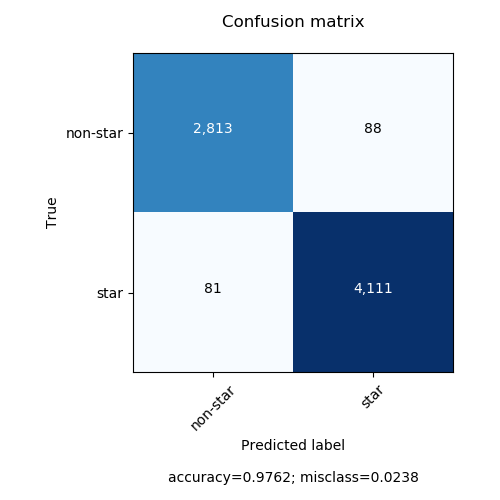

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [65]:
score_nb_0 = score(y_test,y_nb_0,time1_nb_0,time2_nb_0)
score_nb_1 = score(y_test,y_nb_1,time1_nb_1 ,time2_nb_1)
score_nb_2 = score(y_test,y_nb_2,time1_nb_2 ,time2_nb_2)
score_nb_3 = score(y_test,y_nb_3,time1_nb_3 ,time2_nb_3)
score_nb_4 = score(y_test,y_nb_4,time1_nb_4 ,time2_nb_4)
score_nb_5 = score(y_test,y_nb_5,time1_nb_5 ,time2_nb_5)

In [66]:
m1_t = pd.DataFrame({
 'accuracy' : [score_nb_0[1],score_nb_1[1],score_nb_2 [1],score_nb_3[1],score_nb_4[1],score_nb_5[1]],
 'completeness' : [score_nb_0[2],score_nb_1[2],score_nb_2 [2],score_nb_3[2],score_nb_4[2],score_nb_5[2]],
 'contamination' : [score_nb_0[3],score_nb_1[3],score_nb_2 [3],score_nb_3[3],score_nb_4[3],score_nb_5[3]],
 'precision' : [score_nb_0[4],score_nb_1[4],score_nb_2 [4],score_nb_3[4],score_nb_4[4],score_nb_5[4]],
 'recall' : [score_nb_0[5],score_nb_1[5],score_nb_2 [5],score_nb_3[5],score_nb_4[5],score_nb_5[5]],
 'F1 score' : [score_nb_0[6],score_nb_1[6],score_nb_2 [6],score_nb_3[6],score_nb_4[6],score_nb_5[6]],
 'time span' : [score_nb_0[7],score_nb_1[7],score_nb_2 [7],score_nb_3[7],score_nb_4[7],score_nb_5[7]]
                })

m1_t.rename(index = {0: "score_nb_0", 
                     1: "score_nb_1",
                     2: "score_nb_2",
                     3: "score_nb_3",
                     4: "score_nb_4",
                     5: "score_nb_5"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_nb_0,0.400395,0.000235,0.000000,1.000000,0.000235,0.000470,00:00:00.058347
score_nb_1,0.599605,0.999765,0.400310,0.599690,0.999765,0.749692,00:00:00.055855
score_nb_2,0.598477,0.997884,0.400762,0.599238,0.997884,0.748809,00:00:00.053364
score_nb_3,0.832511,0.766808,0.056680,0.943320,0.766808,0.845954,00:00:00.033911
score_nb_4,0.813055,0.758345,0.084563,0.915437,0.758345,0.829519,00:00:00.037899
score_nb_5,0.599041,0.997884,0.400424,0.599576,0.997884,0.749074,00:00:00.028921


<IPython.core.display.Javascript object>


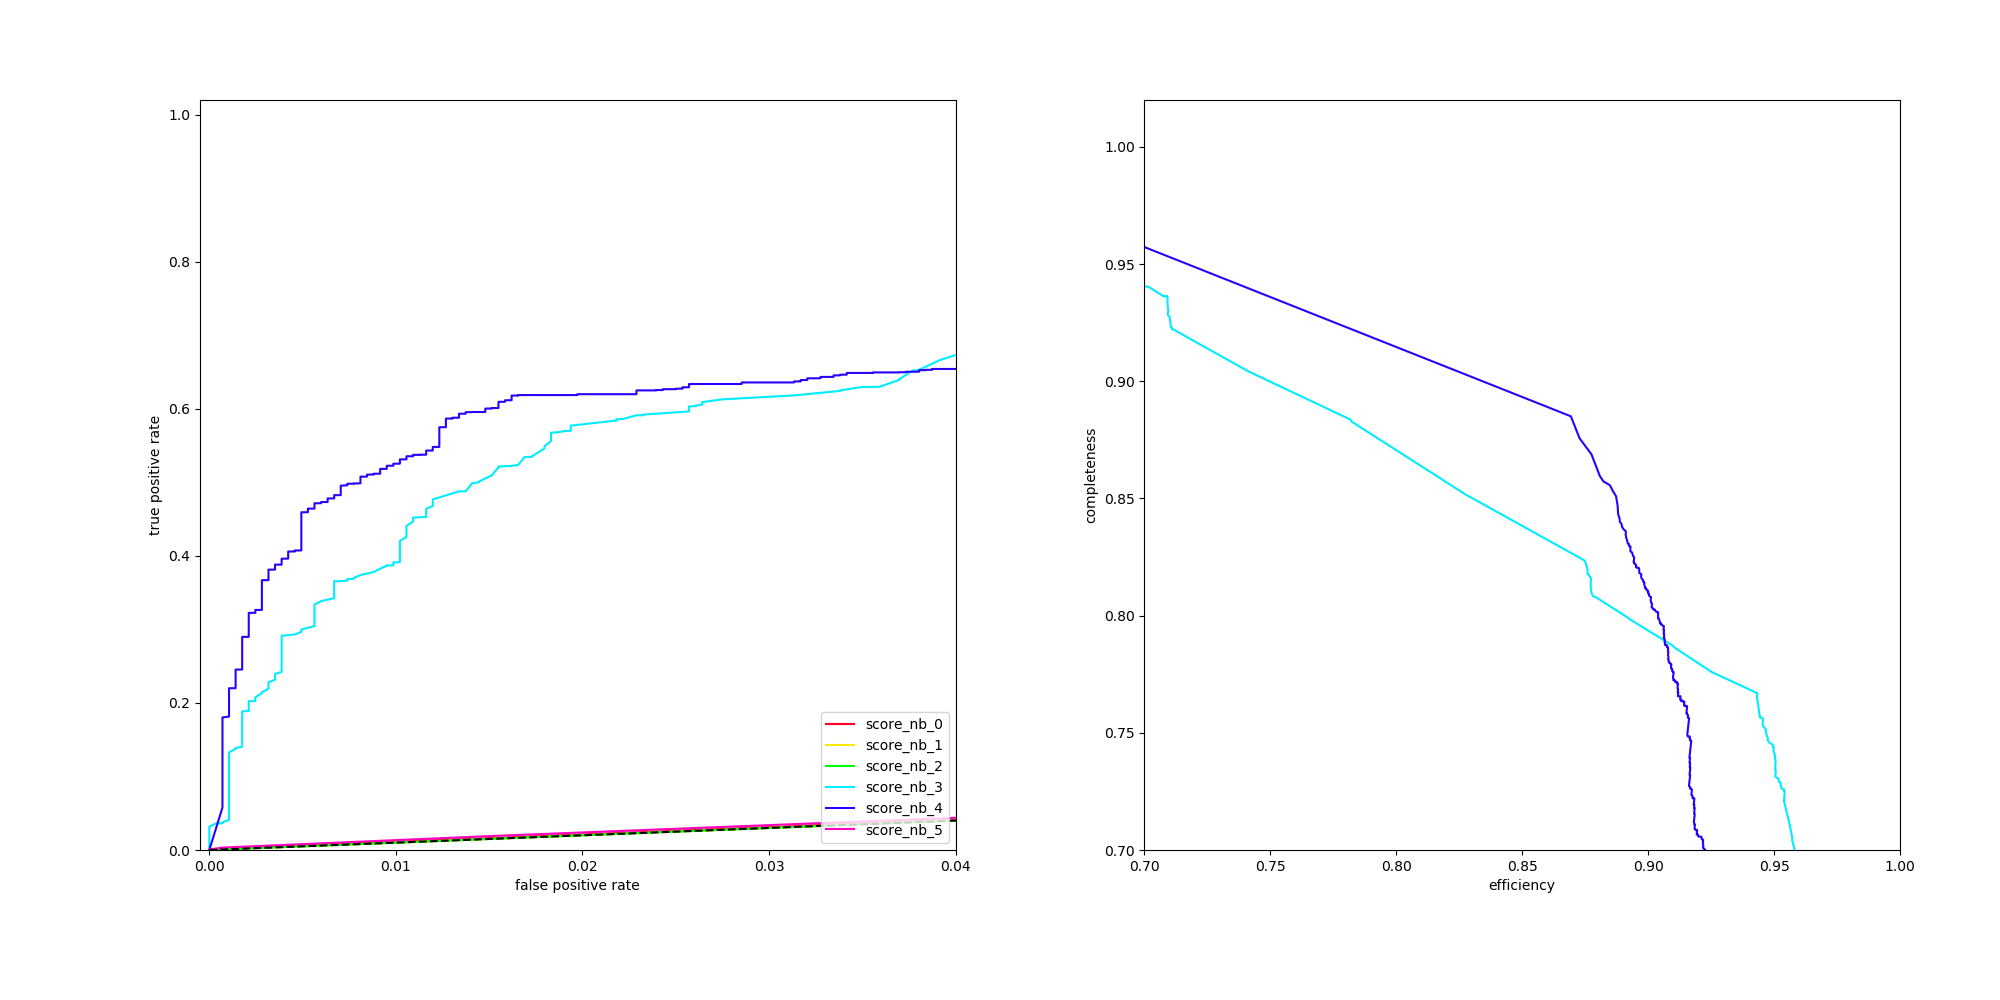

In [67]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_nb_0, y_probs_nb_1, y_probs_nb_2, y_probs_nb_3,y_probs_nb_4,y_probs_nb_5]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(-0.0005, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()